<a href="https://colab.research.google.com/github/EmanVin/Scratch/blob/Sandbox/CoffeeEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=8438c79f23259f2c1b88fc9d5ed86421d6a6343f98d636287b9c2ff06afaf8c0
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=fee2347559c9f1e14b941e9849717821a5fc71d86f3761d163f0629bc9698370
  Stored in directory: /root/.cache/pip/wheels/b9/89/cc/59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent


In [ ]:
import numpy as np
import numba
import umap
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")
penguins.head()

penguins = penguins.dropna()
penguins.species.value_counts()

reducer = umap.UMAP()
penguin_data = penguins[
    [
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

(333, 2)

ValueError: ignored

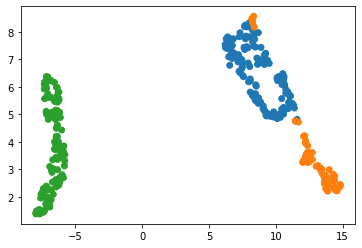

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('eqoual', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);

In [ ]:
pip install umap-learn

[[11.017283   -1.7178496   5.971709  ]
 [11.782783   -0.34881207  6.113899  ]
 [11.662568   -1.1997368   6.5895004 ]
 [11.794479   -1.0012641   5.5885434 ]
 [10.847343   -1.0002005   6.385586  ]
 [10.46179    -1.0966827   4.839864  ]
 [10.391417   -0.36772564  5.095867  ]
 [11.256641   -0.01277805  4.843589  ]
 [11.195055   -0.7124956   4.5154114 ]]


In [ ]:
import numpy as np
import pandas as pd
sample = np.random.choice(5,(7,4))

p_groupings = [.4,.1,.3,.2]
total = 150

p_counts = np.round(np.array(p_groupings)*total).astype(int)
seed = [[[2,3]],[[3,3]],[[2,2]],[[3,2]]]
base = [p for seed_group in [seed[i]*p_counts[i] for i in range(len(seed))] for p in seed_group]
base_array = np.array(base)

f1 = np.concatenate(
     [np.random.choice((1,2),(total,1)),
      np.random.choice(4,(total,1)),
      base_array,
      np.random.choice(10,(total,3))
     ],axis=1)
print(f1.shape)

(150, 7)


[{1: 'hot', 2: 'iced'}, {1: 'zelnut', 2: 'vanilla', 3: 'caramel', 0: 'mocha'}, {2: 'decaf', 3: 'reg'}, {2: 'venti', 3: 'tall'}]


/usr/local/lib/python3.9/dist-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
<ipython-input-68-84d03aad152d>:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(embedding[:, 0],


"ax = plt.figure().add_subplot(projection='3d')\n\nax.scatter3D(embedding[:, 0],\n    embedding[:, 1],embedding[:, 2], cmap='Greens');\n\nplt.title('UMAP projection of coffee variants', fontsize=24);\nfor i in range(len(a)):\n   label = str(lookup[3][a[i][3]][0])+str(lookup[2][a[i][2]][0])\n   label = label + '\n' + str(lookup[1][a[i][1]][0])+ str(lookup[0][a[i][0]][0])\n   ax.text(embedding[i,0],embedding[i,1],embedding[i,2],label,size=10)\n"

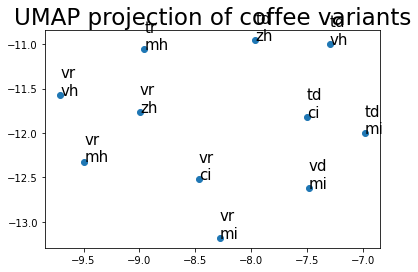

In [ ]:
import numba
import umap
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.special import expit
%matplotlib inline
reducer = umap.UMAP(n_components=2)
size ={'venti':2,'tall':3}
flavor = {'zelnut':1, 'vanilla':2, 'caramel':3 ,'mocha':0}
temp = {'hot':1, 'iced':2}
caffiene = {'decaf':2,'reg':3}

lookup = [temp,flavor, caffiene,size]

inverse_lookup =[]
#for x in lookup:
inverse_lookup = [{value:key for key,value in x.items()} for x in lookup]
lookup = inverse_lookup
print(inverse_lookup)

a = [[1,2,3,2],[2,0,3,2],[1,0,3,2],[1,0,3,3],[2,0,2,2],
     [2,3,3,2],
     [1,1,3,2],
     [1,2,2,3],
     [1,1,2,3],
     [2,3,2,3],[2,0,2,3]]
#a = f1
distarray = sklearn.metrics.pairwise_distances(a, metric='hamming')

sigdist = (distarray * 20) - 10

sigdist = expit(sigdist)

scaledData = StandardScaler().fit_transform(distarray)
embedding = reducer.fit_transform(sigdist)
embedding.shape
#display(pd.DataFrame(scaledData))
ax = plt.figure().add_subplot()

ax.scatter(embedding[:, 0],
    embedding[:, 1],cmap='Greens');

plt.title('UMAP projection of coffee variants', fontsize=23);
for i in range(0,len(a),1):
   label = str(lookup[3][a[i][3]][0])+str(lookup[2][a[i][2]][0])
   label = label + '\n' + str(lookup[1][a[i][1]][0])+ str(lookup[0][a[i][0]][0])
   ax.text(embedding[i,0],embedding[i,1],label,size=15)

"""ax = plt.figure().add_subplot(projection='3d')

ax.scatter3D(embedding[:, 0],
    embedding[:, 1],embedding[:, 2], cmap='Greens');

plt.title('UMAP projection of coffee variants', fontsize=24);
for i in range(len(a)):
   label = str(lookup[3][a[i][3]][0])+str(lookup[2][a[i][2]][0])
   label = label + '\n' + str(lookup[1][a[i][1]][0])+ str(lookup[0][a[i][0]][0])
   ax.text(embedding[i,0],embedding[i,1],embedding[i,2],label,size=10)
"""
  # plt.annotate(label,(embedding[i,0]-.1,embedding[i,1]-0.05,embedding[i,2]))

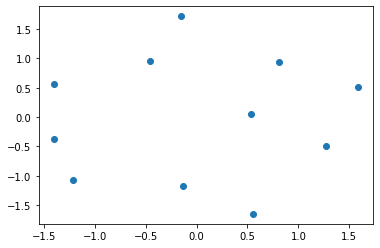

In [ ]:

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
X = StandardScaler().fit_transform(embedding)


plt.scatter(X[:, 0], X[:, 1])
plt.show()

Estimated number of clusters: 2
Estimated number of noise points: 0


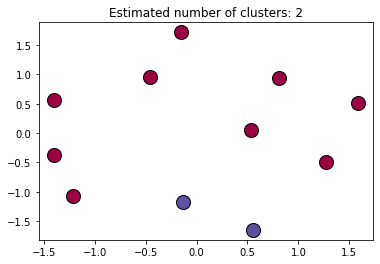

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=.25, min_samples=2,  metric='precomputed' ).fit(distarray)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

[[0.         0.57142857 0.71428571 ... 0.71428571 0.85714286 1.        ]
 [0.57142857 0.         0.71428571 ... 0.85714286 0.85714286 1.        ]
 [0.71428571 0.71428571 0.         ... 0.85714286 0.85714286 0.85714286]
 ...
 [0.71428571 0.85714286 0.85714286 ... 0.         0.57142857 0.57142857]
 [0.85714286 0.85714286 0.85714286 ... 0.57142857 0.         0.57142857]
 [1.         1.         0.85714286 ... 0.57142857 0.57142857 0.        ]]
